In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
# import asyncio
from multiprocessing import pool
from IPython.display import display, clear_output

In [2]:
df = pd.read_csv("card_transdata.csv")

In [3]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [4]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


<AxesSubplot: >

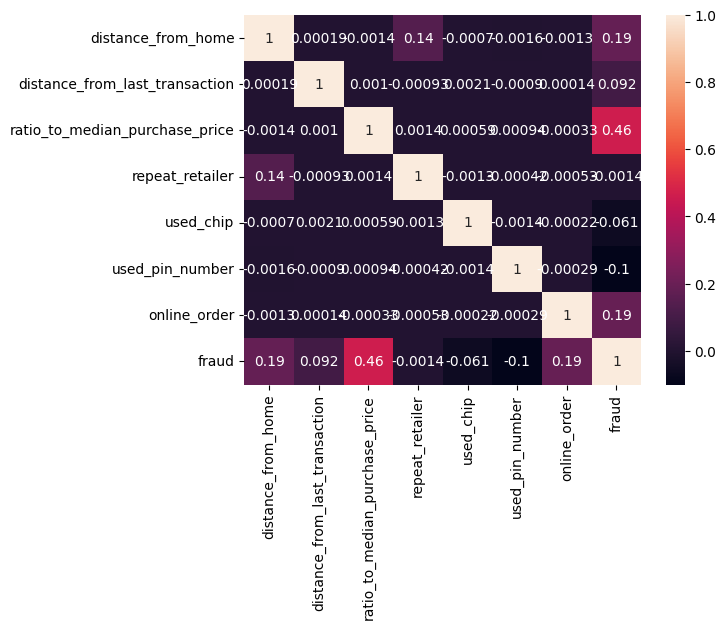

<Figure size 2000x1000 with 0 Axes>

In [5]:
# Correlation
correlation = df.corr()
fig, ax = plt.subplots()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, ax=ax, annot=True)

<AxesSubplot: >

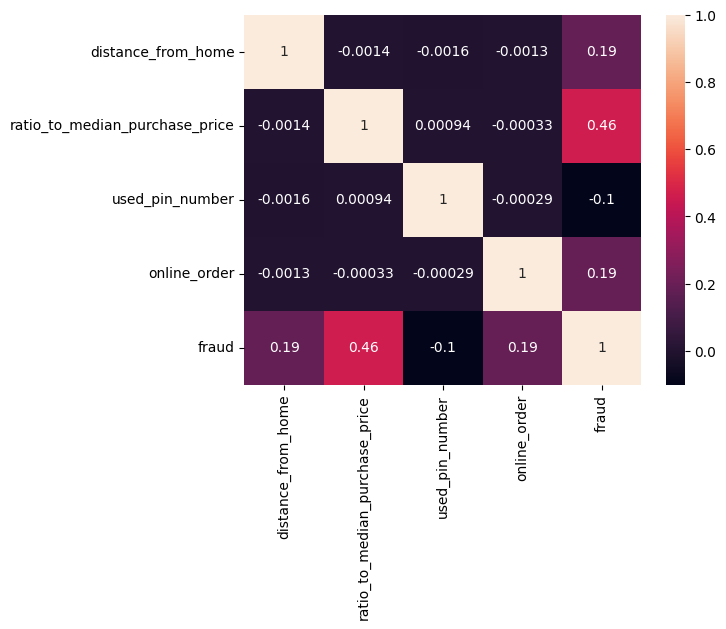

<Figure size 2000x1000 with 0 Axes>

In [6]:
# Feature Selection
df.drop(columns=["distance_from_last_transaction", "repeat_retailer", "used_chip"], inplace=True)
correlation = df.corr()
fig, ax = plt.subplots()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, ax=ax, annot=True)

In [7]:
df.head(1)

,distance_from_home,ratio_to_median_purchase_price,used_pin_number,online_order,fraud
0,57.877857,1.94594,0.0,0.0,0.0


In [8]:
# K NEAREST NEIGHBORS ALGORITHM
class K_Nearest_Neighbors:
    def __init__(self, data, features, output):
        self.data = data
        self.features = features
        self.output = output

    # def fit(data):
        # model_data = data
        # for index, row in model_data.iterrows():

    # def predict(parameters, response_predict):


    # Internal methods
    def euclidean_distance(self, entry1, entry2):
        # Check if the number of rows in row1 and row2 are equal
        if len(entry1.index) != len(entry2.index):
            raise Exception("The entry lengths are not equal")
        # if False in (entry1.columns == entry2.columns).tolist():
        #     raise Exception("The columns in the two passed in entries are not the same")
        
        # Get Distance
        sum = 0
        for i in range(0,len(entry1.index)):
            sum += (entry1[i] - entry2[i]) ** 2
            # print("{} - {}".format(entry1[i], entry2[i]))
        return sqrt(sum)
    def perf_euclidean_distance(self, entry1, entry2):
        return {"sum": self.euclidean_distance(entry1, entry2), "row": entry1}
    
    def get_top_points(self, parameters, closest_points = 3, threading=True, threads=5):
        all_distances = {}
        # Get all distances
        if not threading:
            for index, row in df.iterrows():
                print(self.euclidean_distance(row[self.features], parameters))
        elif threading:
            THREAD_POOL = pool.ThreadPool(processes=threads)
            results = []
            # Submit pool threads
            for index, row in self.data.iterrows():
                clear_output(wait=True)
                display(index)
                results.append(THREAD_POOL.apply_async(self.perf_euclidean_distance, args=(row[self.features], parameters)))
            THREAD_POOL.close()
            THREAD_POOL.join()

        # Find closest points
        num = 0
        # Extract data from the thread objects
        for obj in results:
            all_distances[num] = obj.get()
            num += 1
        # Find the n closest points
        closest = []
        for iterations in range(0, closest_points):
            minimum = list(all_distances)[0]
            for key, value in all_distances.items():
                if value["sum"] < all_distances[minimum]["sum"]:
                    minimum = key
            closest.append(all_distances.pop(minimum))
        test = pd.DataFrame.from_dict(closest)
        display(test)

In [9]:
# K_Nearest_Neighbors.euclidean_distance(data.iloc[0], data.iloc[1])
predict_data = pd.Series({"distance_from_home": 4.231617757197936, "ratio_to_median_purchase_price": 1.413082561435509, "used_pin_number": 1, "online_order": 0})
K_Nearest_Neighbors(df.iloc[:500], features=["distance_from_home", "ratio_to_median_purchase_price", "used_pin_number", "online_order"], output="fraud").get_top_points(parameters=predict_data)

499

,sum,row
0,0.632329,distance_from_home 4.848247 rat...
1,0.731435,distance_from_home 3.501878 rat...
2,1.210176,distance_from_home 4.304048 rat...


In [10]:
# Test Train Split
# split_index = int(len(data_normalized.index) * 0.75)
# training_data, testing_data = data_normalized.iloc[:split_index], data_normalized.iloc[split_index:]

In [11]:
# training_data